# Minería de Datos: Preprocesamiento y Clasificación - DATCOM - 23/24


In [10]:
# Importaciones para manejo de datos y dataframes
import numpy as np
from numpy.random import seed
import pandas as pd

# Importaciones para manejo de archivos y llamadas al OS
import os as os
import warnings

# Importaciones para manejo de gráficos
import pylab as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

# Sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.neighbors import LocalOutlierFactor



# No mostrar warnings de versiones anteriores
warnings.filterwarnings('ignore')

El preprocesamiento está un poco feillo, pero se ha realizado por encima:
- Encoders de Variables categóricas (Salvo el target, hacer labelencoder si se desea)
- Imputación de valores con knn para train y test
- Análisis exploratorio variado, la mayor parte sobre la parte de test, lo suyo sería analizar también la unión de train y test (pero test no tiene la variable target).

Cualquier cosa, error, o mejora, libres de modificar cualquier tema.

<br/>

### Análisis Exploratorio de Datos

In [11]:
# Cargamos csv con los datos de train
df_train = pd.read_csv("../data_raw/training_data.csv", sep=",", header=0, na_values=['?', '', 'NA'])
# Cargamos csv con los datos de test
df_test = pd.read_csv("../data_raw/test_data.csv", sep=",", header=0, na_values=['?', '', 'NA'])

# Dimensión
print(f"Dimensión del dataset de train:\n {df_train.shape} \n")
print(f"Dimensión del dataset de test:\n {df_test.shape} \n")

# Descripción de las variables
print("Descripción de las variables:\n")
df_train.info()

Dimensión del dataset de train:
 (906, 41) 

Dimensión del dataset de test:
 (389, 40) 

Descripción de las variables:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 906 entries, 0 to 905
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      906 non-null    int64  
 1   X1      906 non-null    int64  
 2   X2      906 non-null    int64  
 3   X3      906 non-null    int64  
 4   X4      649 non-null    float64
 5   X5      906 non-null    int64  
 6   X6      906 non-null    float64
 7   X7      906 non-null    int64  
 8   X8      906 non-null    float64
 9   X9      906 non-null    float64
 10  X10     906 non-null    float64
 11  X11     906 non-null    float64
 12  X12     906 non-null    float64
 13  X13     906 non-null    float64
 14  X14     906 non-null    float64
 15  X15     906 non-null    float64
 16  X16     906 non-null    float64
 17  X17     906 non-null    float64
 18  X18     906 non-null    float6

In [12]:
# Estadísticos
df_train.describe()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X29,X31,X32,X33,X34,X35,X36,X37,X38,X39
count,906.000000,9.060000e+02,9.060000e+02,9.060000e+02,6.490000e+02,9.060000e+02,9.060000e+02,9.060000e+02,9.060000e+02,906.000000,...,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000
mean,633.944812,3.448471e+08,1.409140e+08,2.296191e+08,1.679259e+08,3.226934e+08,7.095014e+04,1.834239e+08,2.789998e+06,427.673411,...,1.652058,-2.698231,-0.769670,-6.350003,53.262748,33.762481,19.367833,-6.144963,1.868517,0.042568
std,373.158757,1.011299e+09,4.666272e+08,7.688567e+08,5.322081e+08,9.703791e+08,2.430574e+05,5.380475e+08,1.856681e+07,413.669360,...,3.985377,118.955157,14.969628,49.989149,125.833097,152.764154,15.178570,37.857308,1.920547,0.272180
min,1.000000,4.871587e+06,6.290500e+04,6.277080e+05,1.918500e+04,1.279735e+06,-3.755140e+05,1.158190e+05,4.940000e+02,19.900000,...,0.001800,-1291.330069,-59.883345,-390.835713,-405.450000,-716.824525,-31.590958,-192.898018,0.176400,-2.007800
25%,314.500000,2.871623e+07,5.093032e+06,1.127887e+07,1.434103e+07,2.302948e+07,3.216390e+03,1.071942e+07,9.595350e+04,177.312500,...,0.248725,-8.285000,-3.325000,-5.322500,-1.855000,-19.915000,10.202500,-4.857500,1.019350,-0.033850
50%,617.500000,5.905216e+07,1.601310e+07,2.742359e+07,3.163625e+07,5.728552e+07,1.003438e+04,2.372510e+07,2.280075e+05,297.855000,...,0.754900,0.870000,2.665000,5.410000,33.670000,24.490000,15.855000,3.355000,1.409100,0.064700
75%,956.750000,1.825440e+08,5.803176e+07,9.499336e+07,8.599445e+07,1.707424e+08,3.388975e+04,7.744330e+07,6.547442e+05,511.952500,...,1.752250,5.030000,6.915000,12.762500,83.007500,79.115000,24.372500,8.807500,2.070850,0.155850
max,1295.000000,7.254477e+09,3.540379e+09,5.955596e+09,4.242837e+09,6.869245e+09,2.000147e+06,3.313859e+09,2.679355e+08,2882.360000,...,68.216900,1258.422867,57.725415,244.140000,787.504217,791.913297,69.717079,175.266141,33.602300,3.947700


In [13]:
# Valores únicos.
print(df_train.nunique())

ID      906
X1      896
X2      898
X3      897
X4      645
X5      897
X6      900
X7      894
X8      903
X9      898
X10     901
X11     902
X12     769
X13      65
X14     760
X15     865
X16     588
X17     722
X18     544
X19     580
X20     860
X21     652
X22     853
X23     806
X24       5
X25       2
X26     867
X27     793
X28     832
X29     886
X30       6
X31     800
X32     759
X33     834
X34     885
X35     888
X36     799
X37     782
X38     883
X39     834
RATE      4
dtype: int64


<br/>

### Missing values

In [14]:
# Missing values para TRAIN
print(f"Total missing values por variable TRAIN:\n{df_train.isnull().sum(axis=0)}")

Total missing values por variable TRAIN:
ID        0
X1        0
X2        0
X3        0
X4      257
X5        0
X6        0
X7        0
X8        0
X9        0
X10       0
X11       0
X12       0
X13       0
X14       0
X15       0
X16       0
X17       0
X18       0
X19       0
X20       0
X21     121
X22       0
X23       0
X24       0
X25       0
X26       0
X27       0
X28       0
X29       0
X30       0
X31       0
X32       0
X33       0
X34       0
X35       0
X36       0
X37       0
X38       0
X39       0
RATE      0
dtype: int64


In [15]:
# Missing values para TEST
print(f"Total missing values por variable TEST:\n{df_test.isnull().sum(axis=0)}")

Total missing values por variable TEST:
ID       0
X1       0
X2       0
X3       0
X4     111
X5       0
X6       0
X7       0
X8       0
X9       0
X10      0
X11      0
X12      0
X13      0
X14      0
X15      0
X16      0
X17      0
X18      0
X19      0
X20      0
X21     45
X22      0
X23      0
X24      0
X25      0
X26      0
X27      0
X28      0
X29      0
X30      0
X31      0
X32      0
X33      0
X34      0
X35      0
X36      0
X37      0
X38      0
X39      0
dtype: int64


In [16]:
# Ratio Missing values para TRAIN
ratio_nulos_train = df_train.isnull().sum()/df_train.shape[0]
ratio_nulos_train


ID      0.000000
X1      0.000000
X2      0.000000
X3      0.000000
X4      0.283664
X5      0.000000
X6      0.000000
X7      0.000000
X8      0.000000
X9      0.000000
X10     0.000000
X11     0.000000
X12     0.000000
X13     0.000000
X14     0.000000
X15     0.000000
X16     0.000000
X17     0.000000
X18     0.000000
X19     0.000000
X20     0.000000
X21     0.133554
X22     0.000000
X23     0.000000
X24     0.000000
X25     0.000000
X26     0.000000
X27     0.000000
X28     0.000000
X29     0.000000
X30     0.000000
X31     0.000000
X32     0.000000
X33     0.000000
X34     0.000000
X35     0.000000
X36     0.000000
X37     0.000000
X38     0.000000
X39     0.000000
RATE    0.000000
dtype: float64

In [17]:
# Ratio Missing values para TEST
ratio_nulos_test = df_test.isnull().sum()/df_test.shape[0]
ratio_nulos_test

ID     0.000000
X1     0.000000
X2     0.000000
X3     0.000000
X4     0.285347
X5     0.000000
X6     0.000000
X7     0.000000
X8     0.000000
X9     0.000000
X10    0.000000
X11    0.000000
X12    0.000000
X13    0.000000
X14    0.000000
X15    0.000000
X16    0.000000
X17    0.000000
X18    0.000000
X19    0.000000
X20    0.000000
X21    0.115681
X22    0.000000
X23    0.000000
X24    0.000000
X25    0.000000
X26    0.000000
X27    0.000000
X28    0.000000
X29    0.000000
X30    0.000000
X31    0.000000
X32    0.000000
X33    0.000000
X34    0.000000
X35    0.000000
X36    0.000000
X37    0.000000
X38    0.000000
X39    0.000000
dtype: float64

Tenemos un 28,5 % de nulos en X4, quizás sí es conveniente imputar....o no sé, la quitamos si eso.
En la X21 solo 11% esta sí la imputamos.

<br/>

### Encoding

In [18]:
#CATEGÓRICAS: X24, X25, X30, RATE 

# X24 -> Factor ordenado (VLOW, LOW, MED, HIGH, VHIGH) -> LabelEncoder
# X25 -> Binario (YES, NO) -> LabelEncoder NO -> 0, YES -> 1. (Da un poco igual si es 0,1 o 1,2 la verdad)
# X30 -> ASKVR, CLPXZ, GXZVX, KUHMP, VTKGN, XNHTQ -> OneHotEncoder

# Ninguna presenta nulos, aplicamos las transformaciones y posteriormente imputación de NAs
# ------------------------------------------------------------------------------------------------------


df_train_num = df_train.copy()
df_test_num = df_test.copy()

# 1. "OrdinalEncoder" para X24
orden_x24 = ['VLOW', 'LOW', 'MED', 'HIGH', 'VHIGH']

ordinal_encoder_x24 = OrdinalEncoder(categories=[orden_x24], dtype=int)

df_train_num['X24'] = ordinal_encoder_x24.fit_transform(df_train_num[['X24']])
df_test_num['X24'] = ordinal_encoder_x24.transform(df_test_num[['X24']])

# 2. "OrdinalEncoder" para X25
orden_x25 = ['NO', 'YES']

ordinal_encoder_x25 = OrdinalEncoder(categories=[orden_x25], dtype=int)

df_train_num['X25'] = ordinal_encoder_x25.fit_transform(df_train_num[['X25']])
df_test_num['X25'] = ordinal_encoder_x25.transform(df_test_num[['X25']])


# Si es VTKGN 1 else 0
# Ya que la la clase está muy desbalanceada
df_train_encoded = df_train_num.copy()
df_test_encoded = df_test_num.copy()

df_train_encoded.loc[df_train_num['X30'] == 'VTKGN', 'X30'] = 1
df_train_encoded.loc[df_train_num['X30'] != 'VTKGN', 'X30'] = 0

df_test_encoded.loc[df_test_num['X30'] == 'VTKGN', 'X30'] = 1
df_test_encoded.loc[df_test_num['X30'] != 'VTKGN', 'X30'] = 0

# df_train_encoded['X30'].astype(int)
# df_test_encoded['X30'].astype(int)

# #3. "OneHotEncoder" para X30

# one_hot_encoder = OneHotEncoder(sparse=False, dtype=np.int32)
# col_encoded = one_hot_encoder.fit_transform(df_train_num[["X30"]])
# df_train_encoded = pd.concat([df_train_num, pd.DataFrame(col_encoded, columns=one_hot_encoder.get_feature_names_out(['X30']))], axis=1)

# one_hot_encoder_test = OneHotEncoder(sparse=False, dtype=np.int32)
# col_encoded_test = one_hot_encoder_test.fit_transform(df_train_num[["X30"]]) # ponemos train porque test no tiene todas las distintas categorias
# df_test_encoded = pd.concat([df_test_num, pd.DataFrame(col_encoded_test, columns=one_hot_encoder_test.get_feature_names_out(['X30']))], axis=1)


# Eliminamos original
# df_train_encoded.head()
# df_test_encoded.head()

df_train_encoded['X30'] = pd.to_numeric(df_train_encoded['X30'])
df_test_encoded['X30'] = pd.to_numeric(df_train_encoded['X30']) 



<br/>

### Imputación de Missing Values

In [19]:
# Imputando con KNN (TRAIN)

df_final_train = df_train_encoded.drop(['ID','RATE'], axis=1, inplace=False)
train_ID = df_train_encoded['ID'].copy()
train_RATE = df_train_encoded['RATE'].copy()


# scalamos definitivamente
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_final_train.to_numpy())
df_scaled = pd.DataFrame(df_scaled,index=df_final_train.index, columns=[
  df_final_train.columns])

Knn_imp_train = KNNImputer(n_neighbors=4).fit(df_scaled)
imputed_X_train = pd.DataFrame(Knn_imp_train.transform(df_scaled), columns=df_scaled.columns)

result_df_train = pd.merge(train_ID, imputed_X_train, left_index=True, right_index=True)
result_df_train = pd.merge(result_df_train, train_RATE, left_index=True, right_index=True)
result_df_train.columns = df_train_encoded.columns
# vemos ratio de nulos ahora
ratio_nulos_train_result = result_df_train.isnull().sum()/result_df_train.shape[0]
ratio_nulos_train_result



ID      0.0
X1      0.0
X2      0.0
X3      0.0
X4      0.0
X5      0.0
X6      0.0
X7      0.0
X8      0.0
X9      0.0
X10     0.0
X11     0.0
X12     0.0
X13     0.0
X14     0.0
X15     0.0
X16     0.0
X17     0.0
X18     0.0
X19     0.0
X20     0.0
X21     0.0
X22     0.0
X23     0.0
X24     0.0
X25     0.0
X26     0.0
X27     0.0
X28     0.0
X29     0.0
X30     0.0
X31     0.0
X32     0.0
X33     0.0
X34     0.0
X35     0.0
X36     0.0
X37     0.0
X38     0.0
X39     0.0
RATE    0.0
dtype: float64

In [21]:
# Imputando con KNN (TEST)

df_final_test = df_test_encoded.drop('ID', axis=1, inplace=False)
test_ID = df_test_encoded['ID'].copy()

# scalamos definitivamente
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_final_test.to_numpy())
df_scaled = pd.DataFrame(df_scaled,index=df_final_test.index, columns=[
  df_final_test.columns])

Knn_imp_test = KNNImputer(n_neighbors=4).fit(df_scaled)
imputed_X_test = pd.DataFrame(Knn_imp_test.transform(df_scaled), columns=df_scaled.columns)

result_df_test = pd.merge(test_ID, imputed_X_test, left_index=True, right_index=True)
result_df_test.columns = df_test_encoded.columns
# vemos ratio de nulos ahora
ratio_nulos_test_result = result_df_test.isnull().sum()/result_df_test.shape[0]
ratio_nulos_test_result

result_df_test.head(20)


,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39
0,656,0.019023,0.002823,0.007876,0.017789,0.016167,0.031308,0.014089,0.000468,0.061795,...,1.0,0.605315,0.582553,0.417282,0.575998,0.752168,0.446667,0.877869,0.153407,0.648346
1,174,0.001531,0.003393,0.002360,0.002722,0.000641,0.019439,0.001520,0.002578,0.005888,...,1.0,0.604599,0.545906,0.406263,0.411279,0.494741,0.442324,0.876770,0.062852,0.620300
2,129,0.006421,0.007028,0.006478,0.004570,0.002112,0.021359,0.009849,0.001273,0.030041,...,1.0,0.607331,0.516997,0.400619,0.395174,0.444056,0.616940,0.764366,0.059214,0.607037
3,674,0.004946,0.005739,0.003477,0.002122,0.003929,0.019285,0.009757,0.000049,0.043519,...,1.0,0.606354,0.404845,0.324195,0.378984,0.433968,0.346774,0.731211,0.069005,0.565572
4,197,0.010689,0.012625,0.008233,0.013840,0.005523,0.023367,0.007319,0.000456,0.100632,...,1.0,0.615161,0.562231,0.410342,0.444668,0.518827,0.529681,0.886750,0.084032,0.633328
5,1213,0.001251,0.002483,0.001663,0.000775,0.002797,0.019740,0.003399,0.000409,0.060215,...,1.0,0.605451,0.478224,0.376999,0.369596,0.451056,0.351216,0.799000,0.038152,0.643743
6,715,0.001509,0.001113,0.001511,0.000869,0.001198,0.015485,0.003844,0.000717,0.036343,...,1.0,0.596144,0.172295,0.261904,0.260551,0.327078,0.529681,0.547634,0.022977,0.279997
7,1083,0.001390,0.000513,0.000864,0.007905,0.003373,0.017797,0.002120,0.000727,0.343865,...,1.0,0.617733,0.529241,0.402848,0.404200,0.489922,0.460091,0.825219,0.115248,0.607310
8,623,0.002827,0.001404,0.001066,0.005177,0.002888,0.021335,0.001211,0.000289,0.043558,...,1.0,0.598819,0.651851,0.427970,0.584924,0.660973,0.613781,0.918002,0.224076,0.666251
9,1225,0.003417,0.005908,0.003562,0.001788,0.001244,0.020145,0.006840,0.000342,0.051183,...,1.0,0.609999,0.565377,0.457123,0.444714,0.616147,0.520205,0.921723,0.058925,0.653183


In [22]:
# Conversión de aquellas que eran enteros a enteros tras imputación knn

result_df_train['X25'] = result_df_train['X25'].astype('int')
result_df_train['X30'] = result_df_train['X30'].astype('int')
result_df_test['X25'] = result_df_test['X25'].astype('int')
result_df_test['X30'] = result_df_test['X30'].astype('int')


# EXPERIMENTACIÓN:

### PRIMER EXPERIMENTO
- Sin quitar outliers
- Imputando con KNNImputer (n_neighbors = 4)
- GridSearch para obener mejor modelo, SIN VALIDAR y VALIDANDO CON X%  

In [50]:
# 1. SIN VALIDAR 

# Metemos un gridsearch
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


X = result_df_train.drop(['ID','RATE'], inplace=False, axis=1)
y = result_df_train['RATE']

np.random.seed(1234)

param_grid_knn = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31],                                   
    'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto'],          
    'metric': ['minkowski', 'euclidean', 'manhattan', 'chebyshev']
}

# X_1 = X[['X23','X36','X31','X14','X8','X26']].copy()

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 32, shuffle=False)

kNNModel_grid = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid_knn, verbose=1, cv=10, n_jobs=-1, scoring='accuracy')
kNNModel_grid.fit(X, y)

print(kNNModel_grid.best_estimator_)
print(kNNModel_grid.best_score_)

Fitting 10 folds for each of 256 candidates, totalling 2560 fits
KNeighborsClassifier(algorithm='ball_tree', n_neighbors=13)
0.6036507936507937


In [54]:
# 1. VALIDANDO con 70/30

# Metemos un gridsearch
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

X = result_df_train.drop(['ID','RATE'], inplace=False, axis=1)
y = result_df_train['RATE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 32, shuffle=True)

np.random.seed(1234)

param_grid_knn = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31],                                   
    'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto'],          
    'metric': ['minkowski', 'euclidean', 'manhattan', 'chebyshev']
}


kNNModel_grid = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid_knn, verbose=1, cv=10, n_jobs=-1, scoring='accuracy')
kNNModel_grid.fit(X_train, y_train)

print(kNNModel_grid.best_estimator_)
print(kNNModel_grid.best_score_)

y_pred = kNNModel_grid.predict(X_test)
#print(y_pred)

print(confusion_matrix(y_test, y_pred), ": is the confusion matrix")
print(accuracy_score(y_test, y_pred), ": is the accuracy score")


Fitting 10 folds for each of 256 candidates, totalling 2560 fits
KNeighborsClassifier(algorithm='ball_tree', metric='manhattan', n_neighbors=13)
0.6023809523809524
[[ 6 17  0  0]
 [ 0 97 12  3]
 [ 0 40 18 14]
 [ 0  6 17 42]] : is the confusion matrix
0.5992647058823529 : is the accuracy score


### SEGUNDO EXPERIMENTO
- Sin quitar outliers
- Imputando con KNNImputer (n_neighbors = X) -> Cambiando número de vecinos a la hora del KNNIMputer y DATOS ESCALADOS
- GridSearch para obener mejor modelo, VALIDANDO CON X%  

In [79]:
def imputar_y_escalar_KNNImputer(n_vecinos, df_train, df_test, escalar=True,):
  # Preprocesamiento para TRAIN
  df_final_train = df_train.drop(['ID','RATE'], axis=1, inplace=False)
  train_ID = df_train['ID'].copy()
  train_RATE = df_train['RATE'].copy()
  # Preprocesamiento para TEST
  df_final_test = df_test.drop('ID', axis=1, inplace=False)
  test_ID = df_test['ID'].copy()

  if(escalar):
    
    scaler = MinMaxScaler()
    df_scaled = scaler.fit_transform(df_final_train.to_numpy())
    df_scaled = pd.DataFrame(df_scaled,index=df_final_train.index, columns=[df_final_train.columns])

    scaler_test = MinMaxScaler()
    df_scaled_test = scaler_test.fit_transform(df_final_test.to_numpy())
    df_scaled_test = pd.DataFrame(df_scaled_test,index=df_final_test.index, columns=[df_final_test.columns])

  else:
    df_scaled = df_final_train
    df_scaled_test = df_final_test
  
  Knn_imp_train = KNNImputer(n_neighbors=n_vecinos).fit(df_scaled)
  imputed_X_train = pd.DataFrame(Knn_imp_train.transform(df_scaled), columns=df_scaled.columns)


  Knn_imp_test = KNNImputer(n_neighbors=n_vecinos).fit(df_scaled_test)
  imputed_X_test = pd.DataFrame(Knn_imp_test.transform(df_scaled_test), columns=df_scaled_test.columns)


  result_df_train = pd.merge(train_ID, imputed_X_train, left_index=True, right_index=True)
  result_df_train = pd.merge(result_df_train, train_RATE, left_index=True, right_index=True)
  result_df_train.columns = df_train.columns
  
  result_df_test = pd.merge(test_ID, imputed_X_test, left_index=True, right_index=True)
  result_df_test.columns = df_test.columns

  return result_df_train, result_df_test


In [76]:
for i in np.arange(1,20):
    result_df_train, result_df_test = imputar_y_escalar_KNNImputer(i,df_train_encoded, df_test_encoded, True)
    
    X = result_df_train.drop(['ID','RATE'], inplace=False, axis=1)
    y = result_df_train['RATE']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 32, shuffle=False)

    np.random.seed(1234)

    param_grid_knn = {
        'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31],                                   
        'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto'],          
        'metric': ['minkowski', 'euclidean', 'manhattan', 'chebyshev']
    }


    kNNModel_grid = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid_knn, verbose=0, cv=5, n_jobs=-1, scoring='accuracy')
    kNNModel_grid.fit(X_train, y_train)

    print(f"Intento {i}: Número de vecinos al imputar con KNNImputer: {i}" )
    print(f"Mejores parámetros {kNNModel_grid.best_estimator_}")
    print(f"Acc en GridSearch {kNNModel_grid.best_score_}")

    y_pred = kNNModel_grid.predict(X_test)
    #print(y_pred)

    print("Matriz de confusión:")
    print(confusion_matrix(y_test, y_pred))
    print(f"Acc. en Validación: {accuracy_score(y_test, y_pred)}\n\n")

Intento 1: Número de vecinos al imputar con KNNImputer: 1
Mejores parámetros KNeighborsClassifier(algorithm='ball_tree', metric='manhattan', n_neighbors=29)
Acc en GridSearch 0.6245719285089364
Matriz de confusión:
[[ 1 13  3  0]
 [ 0 97 19  6]
 [ 0 27 22 12]
 [ 0 11 20 41]]
Acc. en Validación: 0.5919117647058824


Intento 2: Número de vecinos al imputar con KNNImputer: 2
Mejores parámetros KNeighborsClassifier(algorithm='ball_tree', metric='manhattan', n_neighbors=29)
Acc en GridSearch 0.6167104111986002
Matriz de confusión:
[[ 1 13  3  0]
 [ 0 97 19  6]
 [ 0 27 23 11]
 [ 0  9 23 40]]
Acc. en Validación: 0.5919117647058824


Intento 3: Número de vecinos al imputar con KNNImputer: 3
Mejores parámetros KNeighborsClassifier(algorithm='ball_tree', metric='manhattan', n_neighbors=29)
Acc en GridSearch 0.6151356080489939
Matriz de confusión:
[[ 1 13  3  0]
 [ 0 98 18  6]
 [ 0 28 22 11]
 [ 0  9 23 40]]
Acc. en Validación: 0.5919117647058824


Intento 4: Número de vecinos al imputar con KNNIm

### TERCER EXPERIMENTO
- Quitando outliers SIN ESCALAR
- Imputando con KNNImputer (n_neighbors = X) y DATOS ESCALADOS
- GridSearch para obener mejor modelo, VALIDANDO CON X%  

In [80]:
def quitar_outliers_escalados(df, escalar=True):
  
  # Neceistamos ID, RATE por separado, para escalar y quitar outliers sin que influyan estos parámetros 
  df_train_no_target = df.drop(['ID','RATE'], inplace=False, axis=1).dropna(axis=0, inplace=False)

  if(escalar):
    scaler = MinMaxScaler()
    df_scaled = scaler.fit_transform(df_train_no_target.to_numpy())
    df_scaled = pd.DataFrame(df_scaled,index=df_train_no_target.index, columns=[df_train_no_target.columns])
  else:
    df_scaled = df_train_no_target

  lof = LocalOutlierFactor()
  y_pred = lof.fit_predict(df_scaled)
  X_scores = lof.negative_outlier_factor_

  iqr = np.quantile(X_scores, 0.75) - np.quantile(X_scores, 0.25)

  #print("The LOF error score has an IQR of {:.4f}".format(iqr))

  cutoff_value = np.quantile(X_scores, 0.25) - (1.5 * iqr)

  #print("The cutouff value to remove outliers using LOF is {:.4f}".format(cutoff_value))

  # Sacamos los índices de los outliers
  df_outliers = df_scaled[X_scores <= cutoff_value]

  # Quitamos estos índices al df encoded.
  df_result = df.drop(df_outliers.index, axis=0, inplace=False)
  
  return df_result

In [82]:
for i in np.arange(1,20):
    df = quitar_outliers_escalados(df_train_encoded,False)
    result_df_train, result_df_test = imputar_y_escalar_KNNImputer(i,df,df_test_encoded,True)
    
    X = result_df_train.drop(['ID','RATE'], inplace=False, axis=1)
    y = result_df_train['RATE']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 32, shuffle=False)

    np.random.seed(1234)

    param_grid_knn = {
        'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31],                                   
        'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto'],          
        'metric': ['minkowski', 'euclidean', 'manhattan', 'chebyshev']
    }


    kNNModel_grid = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid_knn, verbose=0, cv=5, n_jobs=-1, scoring='accuracy')
    kNNModel_grid.fit(X_train, y_train)

    print(f"Intento {i}: Número de vecinos al imputar con KNNImputer: {i}" )
    print(f"Mejores parámetros {kNNModel_grid.best_estimator_}")
    print(f"Acc en GridSearch {kNNModel_grid.best_score_}")

    y_pred = kNNModel_grid.predict(X_test)
    #print(y_pred)

    print("Matriz de confusión:")
    print(confusion_matrix(y_test, y_pred))
    print(f"Acc. en Validación: {accuracy_score(y_test, y_pred)}\n\n")

Intento 1: Número de vecinos al imputar con KNNImputer: 1
Mejores parámetros KNeighborsClassifier(algorithm='ball_tree', metric='manhattan', n_neighbors=25)
Acc en GridSearch 0.39958677685950417
Matriz de confusión:
[[ 0 10  1  2]
 [ 1 86 20  9]
 [ 0 48  7  4]
 [ 0 55 10  6]]
Acc. en Validación: 0.38223938223938225


Intento 2: Número de vecinos al imputar con KNNImputer: 2
Mejores parámetros KNeighborsClassifier(algorithm='ball_tree', metric='manhattan', n_neighbors=21)
Acc en GridSearch 0.4012258953168044
Matriz de confusión:
[[ 0  8  2  3]
 [ 0 84 19 13]
 [ 0 44 10  5]
 [ 0 56  9  6]]
Acc. en Validación: 0.3861003861003861


Intento 3: Número de vecinos al imputar con KNNImputer: 3
Mejores parámetros KNeighborsClassifier(algorithm='ball_tree', metric='manhattan', n_neighbors=27)
Acc en GridSearch 0.39793388429752063
Matriz de confusión:
[[ 0  9  3  1]
 [ 1 89 18  8]
 [ 0 50  7  2]
 [ 0 57  7  7]]
Acc. en Validación: 0.39768339768339767


Intento 4: Número de vecinos al imputar con K

### CUARTO EXPERIMENTO
- Quitando outliers ESCALANDOLOS
- Imputando con KNNImputer (n_neighbors = X) y DATOS ESCALADOS
- GridSearch para obener mejor modelo, VALIDANDO CON X%  

In [83]:
for i in np.arange(1,20):
    df = quitar_outliers_escalados(df_train_encoded,True)
    result_df_train, result_df_test = imputar_y_escalar_KNNImputer(i,df,df_test_encoded,True)
    
    X = result_df_train.drop(['ID','RATE'], inplace=False, axis=1)
    y = result_df_train['RATE']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 32, shuffle=False)

    np.random.seed(1234)

    param_grid_knn = {
        'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31],                                   
        'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto'],          
        'metric': ['minkowski', 'euclidean', 'manhattan', 'chebyshev']
    }


    kNNModel_grid = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid_knn, verbose=0, cv=5, n_jobs=-1, scoring='accuracy')
    kNNModel_grid.fit(X_train, y_train)

    print(f"Intento {i}: Número de vecinos al imputar con KNNImputer: {i}" )
    print(f"Mejores parámetros {kNNModel_grid.best_estimator_}")
    print(f"Acc en GridSearch {kNNModel_grid.best_score_}")

    y_pred = kNNModel_grid.predict(X_test)
    #print(y_pred)

    print("Matriz de confusión:")
    print(confusion_matrix(y_test, y_pred))
    print(f"Acc. en Validación: {accuracy_score(y_test, y_pred)}\n\n")

Intento 1: Número de vecinos al imputar con KNNImputer: 1
Mejores parámetros KNeighborsClassifier(algorithm='ball_tree', metric='chebyshev', n_neighbors=29)
Acc en GridSearch 0.41271708683473385
Matriz de confusión:
[[ 0 10  3  0]
 [ 0 94 17  3]
 [ 1 49  8  1]
 [ 0 60 10  0]]
Acc. en Validación: 0.3984375


Intento 2: Número de vecinos al imputar con KNNImputer: 2
Mejores parámetros KNeighborsClassifier(algorithm='ball_tree', metric='chebyshev', n_neighbors=29)
Acc en GridSearch 0.4110224089635854
Matriz de confusión:
[[ 0 10  3  0]
 [ 0 94 17  3]
 [ 1 48  8  2]
 [ 0 60 10  0]]
Acc. en Validación: 0.3984375


Intento 3: Número de vecinos al imputar con KNNImputer: 3
Mejores parámetros KNeighborsClassifier(algorithm='ball_tree', metric='chebyshev', n_neighbors=29)
Acc en GridSearch 0.4093417366946778
Matriz de confusión:
[[ 0 10  3  0]
 [ 0 94 17  3]
 [ 1 48  8  2]
 [ 0 60 10  0]]
Acc. en Validación: 0.3984375


Intento 4: Número de vecinos al imputar con KNNImputer: 4
Mejores parámetro

### QUINTO EXPERIMENTO
- SIN QUITAR OUTLIERS
- Imputando con KNNImputer (n_neighbors = X) y DATOS ESCALADOS
- GridSearch para obener mejor modelo, VALIDANDO CON X%  
- Viendo desbalanceo de clases y balanceando con SMOTE, y después validando. 

In [84]:
print(df_train_encoded.groupby(['RATE'])['RATE'].count())
print("\n")
print(df_train_encoded.shape)

RATE
A     74
B    386
C    232
D    214
Name: RATE, dtype: int64


(906, 41)


In [85]:
# La clase está desbalanceada, vamos a probar a balancear y ver si mejoramos la precisión para validación.

# check version number
import imblearn
print(imblearn.__version__)

0.11.0


RATE
A     74
B    386
C    232
D    214
Name: RATE, dtype: int64


(906, 41)


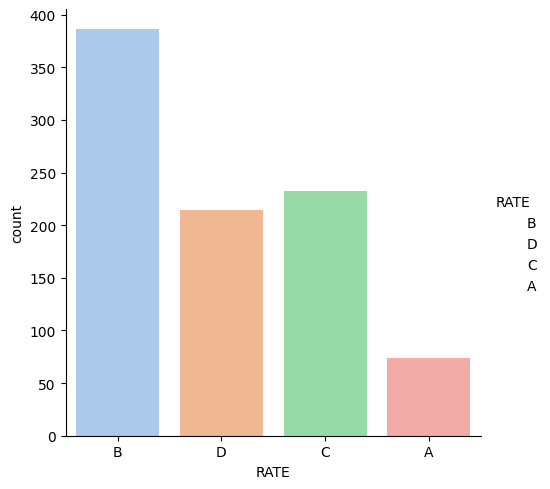

In [101]:
#1. Imputamos con k=5 y escalamos
result_df_train, result_df_test = imputar_y_escalar_KNNImputer(5,df_train_encoded,df_test_encoded,True)

sns.catplot(data=result_df_train, x="RATE", kind="count", palette="pastel")

print(result_df_train.groupby(['RATE'])['RATE'].count())
print("\n")
print(result_df_train.shape)

[0.31761594 0.15025554]


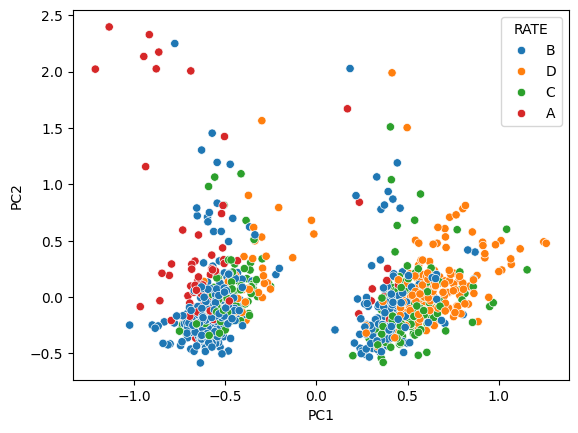

In [108]:
X = result_df_train.drop(['ID','RATE'], inplace=False, axis=1)
y = result_df_train['RATE']

pca = PCA(n_components=2)
pca_features = pca.fit_transform(X)

pca_df = pd.DataFrame(data=pca_features, columns =['PC1','PC2'])
print(pca.explained_variance_ratio_)

pca_df['RATE'] = result_df_train['RATE']

sns.scatterplot(pca_df,x="PC1",y="PC2", hue="RATE")
plt.show()

# sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="RATE")

[0.33442723 0.20950265]


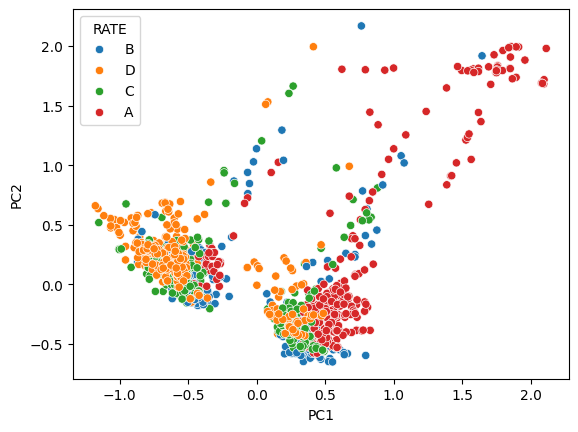

In [113]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_resampled, y_resampled = oversample.fit_resample(X, y)


pca = PCA(n_components=2)
pca_features = pca.fit_transform(X_resampled)

pca_df = pd.DataFrame(data=pca_features, columns =['PC1','PC2'])
print(pca.explained_variance_ratio_)

pca_df['RATE'] = y_resampled

sns.scatterplot(pca_df,x="PC1",y="PC2", hue="RATE")
plt.show()

In [114]:
print(pca_df.groupby(['RATE'])['RATE'].count())
print("\n")
print(pca_df.shape)

RATE
A    386
B    386
C    386
D    386
Name: RATE, dtype: int64


(1544, 3)


Probamos después del resample simple, con todas las clases aumentadas al máximo

In [119]:
for i in np.arange(1,20):
    

    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.4, random_state = 32, shuffle=True)
    X_train_not_res, X_test_not_res, y_train_not_res, y_test_not_res = train_test_split(X, y, test_size=0.4, random_state = 32, shuffle=True)

    np.random.seed(1234)

    param_grid_knn = {
        'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31],                                   
        'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto'],          
        'metric': ['minkowski', 'euclidean', 'manhattan', 'chebyshev']
    }


    kNNModel_grid = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid_knn, verbose=0, cv=5, n_jobs=-1, scoring='accuracy')
    kNNModel_grid.fit(X_train, y_train)

    print(f"Intento {i}: Número de vecinos al imputar con KNNImputer: {i}" )
    print(f"Mejores parámetros {kNNModel_grid.best_estimator_}")
    print(f"Acc en GridSearch {kNNModel_grid.best_score_}")

    y_pred = kNNModel_grid.predict(X_test_not_res)
    #print(y_pred)

    print("Matriz de confusión:")
    print(confusion_matrix(y_test_not_res, y_pred))
    print(f"Acc. en Validación: {accuracy_score(y_test_not_res, y_pred)}\n\n")
    
    
    # En la partición de validación no hay muestras resampleadas, y aún así está dando buenos resultados. Sí es posible que ese split que hace sea el mismo o en su mayoría que en train

Intento 1: Número de vecinos al imputar con KNNImputer: 1
Mejores parámetros KNeighborsClassifier(algorithm='ball_tree', metric='manhattan', n_neighbors=1)
Acc en GridSearch 0.7699796570764313
Matriz de confusión:
[[ 31   0   1   0]
 [ 10 117  26   2]
 [  1   6  64  15]
 [  0   3   7  80]]
Acc. en Validación: 0.8044077134986226


Intento 2: Número de vecinos al imputar con KNNImputer: 2
Mejores parámetros KNeighborsClassifier(algorithm='ball_tree', metric='manhattan', n_neighbors=1)
Acc en GridSearch 0.7699796570764313
Matriz de confusión:
[[ 31   0   1   0]
 [ 10 117  26   2]
 [  1   6  64  15]
 [  0   3   7  80]]
Acc. en Validación: 0.8044077134986226


Intento 3: Número de vecinos al imputar con KNNImputer: 3
Mejores parámetros KNeighborsClassifier(algorithm='ball_tree', metric='manhattan', n_neighbors=1)
Acc en GridSearch 0.7699796570764313
Matriz de confusión:
[[ 31   0   1   0]
 [ 10 117  26   2]
 [  1   6  64  15]
 [  0   3   7  80]]
Acc. en Validación: 0.8044077134986226


Inte